<img style="float: right;" src="static/small.jpg">

---

# Pandas String and Datetime Exercises

See also: [Working with Text Data](http://pandas.pydata.org/pandas-docs/stable/text.html)

See also: [Pandas String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary)

See also: [Time Series / Date Functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

See also: [Computational Tools](http://pandas.pydata.org/pandas-docs/stable/computation.html)

---

In [1]:
# 1. import pandas as pd, create a dataframe using CFPB.csv, and read_csv into 'df'.

import pandas as pd

df = pd.read_csv('data/cfpb_complaints_with_fictitious_data.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Consumer Claim,Company Offer,Amount Received
0,3/24/2015,Credit card,NaN,Other,NaN,Received Capital One charge card offer XXXX. A...,NaN,Capital One,OH,440XX,...,Consent provided,Web,3/30/2015,Closed with explanation,Yes,No,1297939,332.63,217.18,130.22
1,3/23/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted me after I asked not to,I do n't know how they got my cell number. I t...,NaN,"CCS Financial Services, Inc.",AR,727XX,...,Consent provided,Web,3/23/2015,Closed with explanation,Yes,No,1296593,54.79,41.48,49.14
2,3/23/2015,Credit card,NaN,Rewards,NaN,I 'm a longtime member of Charter One Bank/RBS...,NaN,"Citizens Financial Group, Inc.",MI,482XX,...,Consent provided,Web,3/23/2015,Closed with explanation,Yes,Yes,1296693,215.04,231.67,155.28
3,3/23/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,"After looking at my credit report, I saw a col...",Company chooses not to provide a public response,Experian,FL,331XX,...,Consent provided,Web,3/27/2015,Closed with non-monetary relief,Yes,No,1296955,3.31,6.30,4.59
4,3/23/2015,Debt collection,Payday loan,Improper contact or sharing of info,Talked to a third party about my debt,I received a call from a XXXX XXXX from XXXX @...,NaN,"Big Picture Loans, LLC",SC,291XX,...,Consent provided,Web,3/23/2015,Closed with explanation,Yes,No,1296727,73.99,76.75,46.02


In [2]:
# 2. Use the .str namespace of the Issue column to access the .str.upper() method

upper_df = df['Issue'].str.upper()
upper_df.head(3)

0                                  OTHER
1    IMPROPER CONTACT OR SHARING OF INFO
2                                REWARDS
Name: Issue, dtype: object

In [3]:
# 3. Use the .str.split() method to split df['Issue'] into strings.

split_df = df['Issue'].str.split()
split_df.head(3)

0                                       [Other]
1    [Improper, contact, or, sharing, of, info]
2                                     [Rewards]
Name: Issue, dtype: object

In [4]:
# 4. Use dir() on df['Issue'].str to get all the availible string methods.

dir_list = dir(df['Issue'].str)
dir_list[-10:]

['slice_replace',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'wrap',
 'zfill']

In [5]:
# 5. Use the .str.replace() method to replace the letters 'or' with '!' in 'Issue', and then capitalize.

replaced_df = df['Issue'].str.replace('or', '!')
replaced_df.head(5)

0                                  Other
1     Improper contact ! sharing of info
2                                Rewards
3    Inc!rect inf!mation on credit rep!t
4     Improper contact ! sharing of info
Name: Issue, dtype: object

In [6]:
# 6. Use .str.extract() with regex r'(\b\S\S\S\b)' to get the first 3-letter word from Complaint.

extracted_df = df['Consumer complaint narrative'].str.extract(r'(\s\S\S\S\s)', expand=False)
extracted_df.head(5)

0     One 
1     n't 
2     One 
3     saw 
4     Ext 
Name: Consumer complaint narrative, dtype: object

In [7]:
# 7. Use .str.contains() with 'lawyer' regex to select all rows with lawyer (boolean indexing)

mask = df['Consumer complaint narrative'].str.contains('lawyer')
lawyer_df = df[mask]
lawyer_df.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Consumer Claim,Company Offer,Amount Received
7,3/23/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,I had my purse stolen in 2007. They never foun...,Company chooses not to provide a public response,Experian,ME,044XX,...,Consent provided,Web,3/23/2015,Closed with explanation,Yes,No,1296785,5.47,4.06,6.69
11,3/23/2015,Debt collection,Mortgage,Communication tactics,Threatened to take legal action,"Going through a divorce, my ex and I were unab...",NaN,Citibank,FL,330XX,...,Consent provided,Web,3/23/2015,Closed with explanation,Yes,No,1295146,78.73,59.09,58.94
47,3/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,We fell behind in our payments back in 2014 fo...,NaN,Nationstar Mortgage,VA,230XX,...,Consent provided,Web,3/19/2015,Closed with explanation,Yes,No,1292139,61228.78,80961.10,22089.39


In [8]:
# 8. Index the .str namespace of 'Issue' directly with [] to get the first three letters of each string.

df['Issue'].str[:3]

0         Oth
1         Imp
2         Rew
3         Inc
4         Imp
5         Dea
6         Con
7         Inc
8         Oth
9         Con
10        Can
11        Com
12        Loa
13        Loa
14        Dis
15        Lat
16        Bil
17        Cre
18        Fal
19        Loa
20        Can
21        Con
22        Cre
23        Usi
24        Com
25        Loa
26        Inc
27        Dis
28        Acc
29        Fal
         ... 
125650    Loa
125651    Pro
125652    Pro
125653    Con
125654    App
125655    Con
125656    Dea
125657    Dis
125658    Ide
125659    Con
125660    Acc
125661    Dis
125662    Rew
125663    Dea
125664    Inc
125665    Inc
125666    Oth
125667    Acc
125668    Inc
125669    Dis
125670    Con
125671    Imp
125672    Inc
125673    Usi
125674    Loa
125675    Man
125676    Can
125677    Acc
125678    Dep
125679    Cre
Name: Issue, dtype: object

In [9]:
# 9. Create a range of dates from 1/1/2000 to 12/31/2020 using pd.date_range and assign it to 'dindex'

dindex = pd.date_range('1/1/2000', '12/31/2020', freq='D')
dindex

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=7671, freq='D')

In [10]:
# 10. Create a times from 9am on 1/1/2000 to 9pm on 1/3/2000 using pd.date_range

daterange = pd.date_range('1/1/2000', '1/3/2000', freq='H')
daterange[:10]

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [11]:
# 11. pd.read_csv the simple.csv with arguments: infer_datetime_format=True, parse_dates=['Date']. Assign to 'df'

df = pd.read_csv('data/simple.csv', infer_datetime_format=True, parse_dates=['Date'])
df

,Date,Count,Weird Date,Weird Count
0,2016-12-01,11.0,"\tThursday, December 01, 2016",11
1,2016-12-02,NaN,"Friday, December 02, 2016",NaN
2,2016-12-03,49.0,"Saturday, December 03, 2016",49
3,2016-12-04,48.0,NaN,48
4,2016-12-05,29.0,"Monday, December 05, 2016",29
5,2016-12-06,NaN,"Tuesday, December 06, 2016",NaN
6,2016-12-07,36.0,"Wednesday, December 07, 2016",36
7,2016-12-08,45.0,"Thursday, December 08, 2016",45
8,2016-12-09,40.0,"Friday, December 09, 2016",40
9,2016-12-10,22.0,"Saturday, December 10, 2016",22


In [12]:
# 12. Use the dataframe's set_index() with inplace=True to index on Date. Assign result to 'df'.

df.set_index('Date', inplace=True)

In [13]:
# 13. Now use the dataframe's resample method to mean() to get a biweekly average.

df.resample('2w').mean()

,Count
Date,
2016-12-04,36.000000
2016-12-18,34.230769
2017-01-01,26.214286
2017-01-15,30.500000
2017-01-29,25.769231
2017-02-12,27.000000


In [14]:
# 14. Use the dataframe's rolling() method to get a 3 day rolling mean. Assign to 'roll_df'.

roll_df = df.rolling(3).mean()
roll_df

,Count,Weird Date,Weird Count
Date,,,
2016-12-01,NaN,"\tThursday, December 01, 2016",11
2016-12-02,NaN,"Friday, December 02, 2016",NaN
2016-12-03,NaN,"Saturday, December 03, 2016",49
2016-12-04,NaN,NaN,48
2016-12-05,42.000000,"Monday, December 05, 2016",29
2016-12-06,NaN,"Tuesday, December 06, 2016",NaN
2016-12-07,NaN,"Wednesday, December 07, 2016",36
2016-12-08,NaN,"Thursday, December 08, 2016",45
2016-12-09,40.333333,"Friday, December 09, 2016",40


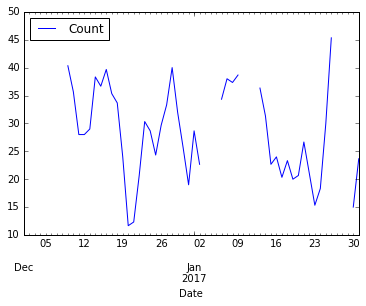

In [15]:
# 15. Import matplotlib, set %matplotlib inline, use the plot method of roll_df[['Count]]

import matplotlib
%matplotlib inline

roll_df[['Count']].plot()

## Next: [Pandas Apply](16_pandas_apply.ipynb)